In [1]:
import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()
type(x_train)

11501568/11490434 [==============================] - 0s 0us/step


numpy.ndarray

In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
y_train.shape


(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

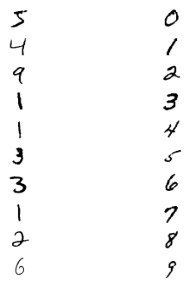

In [6]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.show()

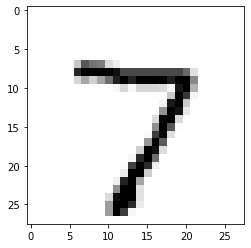

In [7]:
plt.imshow(x_valid[0],cmap='Greys')

In [8]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
#preprocess data

x_train = x_train.reshape(60000,784).astype('float32')
x_valid = x_valid.reshape(10000,784).astype('float32')
x_train/=255
x_valid/=255
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
from keras import utils as np_utils
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
x_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=Sequential()
#neurons in dense layers receive output from neurons of previous layer

model.add(Dense(64, activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
480/480 [==============================] - 3s 3ms/step - loss: 0.0917 - accuracy: 0.1239
Epoch 2/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1511
Epoch 3/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1680
Epoch 4/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.1914
Epoch 5/75
480/480 [============================

KeyboardInterrupt: ignored

In [13]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=125,epochs=75,verbose=1)


Epoch 1/75
480/480 [==============================] - 3s 5ms/step - loss: 0.0784 - accuracy: 0.4715
Epoch 2/75
480/480 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.4804
Epoch 3/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0775 - accuracy: 0.4898
Epoch 4/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.4990
Epoch 5/75
480/480 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.5080
Epoch 6/75
480/480 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.5149
Epoch 7/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.5225
Epoch 8/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0751 - accuracy: 0.5296
Epoch 9/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.5354
Epoch 10/75
480/480 [==============================] - 1s 3ms/step - loss: 0.0742 - accuracy: 0.5414

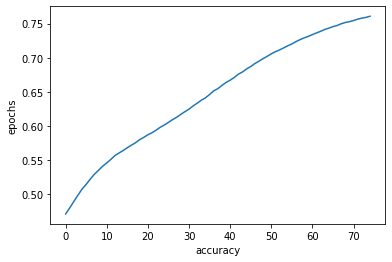

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()